In [1]:
!python3 --version

Python 3.10.19


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# -------------------------------
# 1. Generate synthetic data
# -------------------------------
np.random.seed(42)

X = np.linspace(1, 10, 100).astype(np.float32)
y = 5 * X + 10 + np.random.randn(*X.shape).astype(np.float32) * 2

In [4]:
# -------------------------------
# 2. Custom MAPE loss (safe)
# -------------------------------
def custom_mape(y_true, y_pred):
    epsilon = 1e-7
    return tf.reduce_mean(
        tf.abs((y_true - y_pred) / (y_true + epsilon))
    ) * 100

In [5]:

# -------------------------------
# 3. Custom R² Metric (correct)
# -------------------------------
class R2Score(tf.keras.metrics.Metric):
    def __init__(self, name="r2_score", **kwargs):
        super().__init__(name=name, **kwargs)
        self.ss_res = self.add_weight(name="ss_res", initializer="zeros")
        self.ss_tot = self.add_weight(name="ss_tot", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)

        self.ss_res.assign_add(
            tf.reduce_sum(tf.square(y_true - y_pred))
        )
        self.ss_tot.assign_add(
            tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
        )

    def result(self):
        return 1 - (self.ss_res / (self.ss_tot + 1e-7))

    def reset_states(self):
        self.ss_res.assign(0.0)
        self.ss_tot.assign(0.0)

In [7]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),  # recommended
    tf.keras.layers.Dense(1)
])


In [8]:
# -------------------------------
# 5. Compile model
# -------------------------------
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=custom_mape,
    metrics=[R2Score()]
)


In [9]:

# -------------------------------
# 6. Train model
# -------------------------------
history = model.fit(
    X,
    y,
    epochs=100,
    verbose=1
)

Epoch 1/100


2026-02-08 23:37:04.468182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 78.8529 - r2_score: -183.5592
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 70.5255 - r2_score: -154.2413 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 62.2003 - r2_score: -128.7063 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.9359 - r2_score: -108.9536 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 45.7421 - r2_score: -92.2794  
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37.6907 - r2_score: -82.0451 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29.4787 - r2_score: -74.8482 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.6516 - r2_score: -73.1623 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.5453 - r2_score: -76.0716 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.2441 - r2_score: -76.3328 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.1919 - r2_score: -78.6406 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/ste

In [10]:
# -------------------------------
# 7. Make predictions
# -------------------------------
preds = model.predict(X).squeeze()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


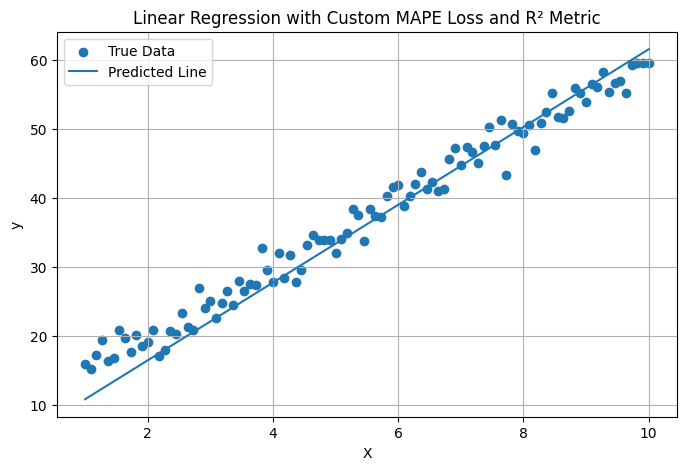

In [11]:

# -------------------------------
# 8. Plot results
# -------------------------------
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="True Data")
plt.plot(X, preds, label="Predicted Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with Custom MAPE Loss and R² Metric")
plt.legend()
plt.grid(True)
plt.show()

In [12]:


# -------------------------------
# 9. Display learned parameters
# -------------------------------
w, b = model.layers[0].get_weights()
print(f"Learned weight (slope): {w[0][0]:.2f}")
print(f"Learned bias (intercept): {b[0]:.2f}")


Learned weight (slope): 5.64
Learned bias (intercept): 5.19
